In [11]:
import sys
from glob import glob
sys.path.append('../')
import numpy as np
import matplotlib.pyplot as plt
from astropy.table import Table

from xrt import load_xrt, curves
from source_names_dict import source_names_dict, source_names_readable

In [13]:
# Fix glob square bracket issue
to_replace = {'[':'[[]',
              ']':'[]]'}
simbad_name_glob = simbad_name.translate(str.maketrans(to_replace))
s = f'/mnt/d/anticorr_data/UKSSDC/{simbad_name_glob}/*/*/*hardrat_HR_PC.csv'


IndexError: list index out of range

In [20]:
glob(f'/mnt/d/anticorr_data/lightcurves/xrt/*{simbad_name_glob}*')

['/mnt/d/anticorr_data/lightcurves/xrt/ESO_243-49_HLX-1,curve_nosys_join.csv',
 '/mnt/d/anticorr_data/lightcurves/xrt/ESO_243-49_HLX-1,hardrat_join.csv']

In [10]:
lcs_pc = {}
lcs_hard = {}
lcs_soft = {}
lcs_hr = {}

for simbad_name, local_name in source_names_dict.items():
    lcs_pc[simbad_name] = load_xrt(simbad_name, curve='PC', pandas=False)


IndexError: list index out of range

In [3]:
lc_pc_mean = {}
for simbad_name, lc in lcs_pc.items():
    lc_pc_mean[simbad_name] = lc['RATE'].mean()
    
lc_pc_mean

{}

In [4]:
simbad_names_by_mean = sorted(lc_pc_mean, key=lc_pc_mean.get)
simbad_names_by_mean

[]

In [5]:
plt.figure(figsize=(10,16))

height = 0
for simbad_name in simbad_names_by_mean:
    lc = lcs_pc[simbad_name]
    readable_name = source_names_readable[simbad_name]
    print(simbad_name)
    
    if len(lc) == 0:
        continue
    elif lc['RATE'].max() > 2:
        continue
    elif len(lc) < 30:
        continue
    #plt.plot(lc['RATE']-np.mean(lc['RATE'])+height, label=simbad_name)
    xplot = np.arange(len(lc))
    yplot = lc['RATE']-np.mean(lc['RATE'])+height
    yerr  = lc['RATE_ERR']
    
    plt.errorbar(x=xplot, y=yplot, yerr=yerr, label=simbad_name, ls='none', lw=1.0, capsize=1.0)

    #plt.text(s=readable_name, x=len(lc['RATE'])+5, y=height)
    height += 1


#plt.legend()
#plt.axis('off') 
plt.show()

<Figure size 720x1152 with 0 Axes>

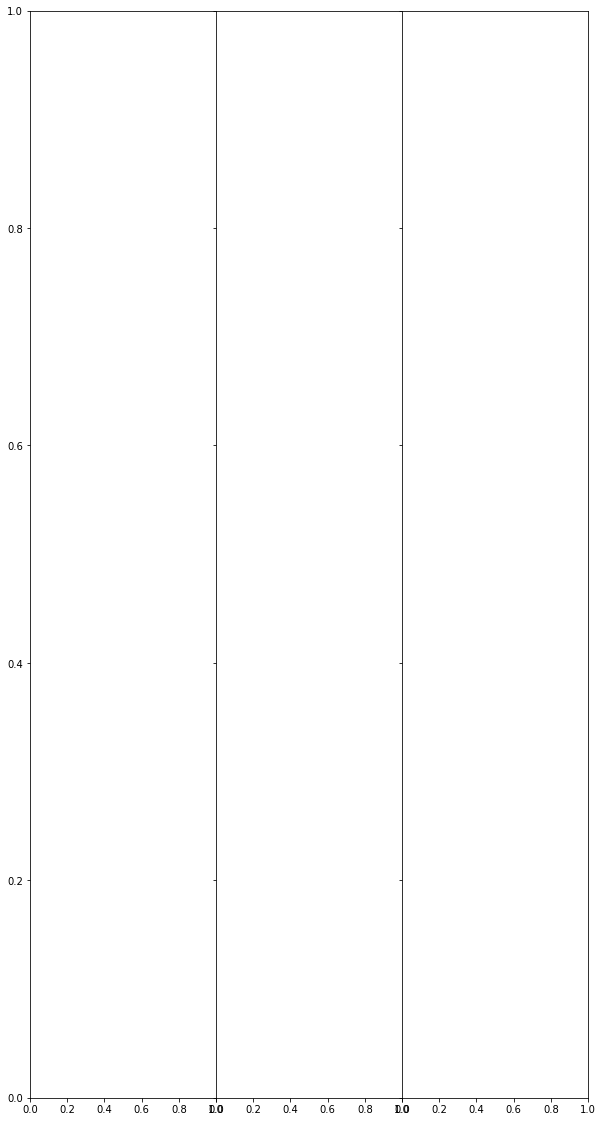

In [6]:

fig, ax = plt.subplots(int(len(simbad_names_by_mean)/3)+1,3, figsize=(10,20), sharey='row')
axes = ax.flatten()
i=0
for simbad_name in simbad_names_by_mean:
    lc = lcs_pc[simbad_name]
    readable_name = source_names_readable[simbad_name]
    
    xplot = np.arange(len(lc))
    yplot = lc['RATE']
    yerr  = lc['RATE_ERR']
    
    axes[i].errorbar(x=xplot, y=yplot, yerr=yerr, label=readable_name, ls='none', lw=1.0, capsize=1.0, color='black')
    #axes[i].text(s=readable_name, x=len(lc['RATE'])+5, y=np.mean(lc['RATE']))
    #axes[i].set_title(readable_name)
    axes[i].legend()
    #axes[i].axis('off')
    axes[i].get_xaxis().set_visible(False)
    i+=1
    
plt.subplots_adjust(wspace=0, hspace=0)
#plt.tight_layout()

In [7]:
LC = lcs_pc['NAME_NGC_7793_P13']
plt.figure(figsize=(10,8))
plt.errorbar(LC['MJD_0'], LC['RATE'], yerr=LC['RATE_ERR'], ls='none', lw=1.0, capsize=1.0, color='black')
#plt.xlim(2200, 3500)

KeyError: 'NAME_NGC_7793_P13'